In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import os

In [15]:
data_path = os.getcwd() +"/CNNresults/"
print(data_path)

/afs/inf.ed.ac.uk/user/s15/s1505448/Documents/ivc/ivcproject/CNNresults/


In [30]:
plt.style.use('seaborn')
    

In [24]:
temp = []
temp1 = []

In [25]:
for root,_,paths in os.walk(data_path):
    temp =(paths)


In [26]:
for thing in temp:
    temp1.append(root+thing)
    


In [27]:
temp1

['/afs/inf.ed.ac.uk/user/s15/s1505448/Documents/ivc/ivcproject/CNNresults/summary.csv',
 '/afs/inf.ed.ac.uk/user/s15/s1505448/Documents/ivc/ivcproject/CNNresults/test_summary.csv']

In [28]:
scores = pd.read_csv(temp1[0])

In [39]:
testscores = pd.read_csv(temp1[1])

In [46]:
scores

,train_acc,train_loss,val_acc,val_loss,train_jac,val_jac
0,0.892398,0.363611,0.896719,0.348785,3.781129e-03,0.001481
1,0.913706,0.292104,0.896580,0.314533,7.769145e-14,0.001481
2,0.913373,0.264799,0.897358,0.282233,5.345581e-03,0.009855
3,0.914181,0.250278,0.897380,0.274162,1.200695e-02,0.069001
4,0.914757,0.236772,0.899210,0.263426,3.915394e-02,0.060468
5,0.916356,0.222637,0.901095,0.261924,6.000582e-02,0.085966
6,0.916928,0.216161,0.900873,0.246910,6.821847e-02,0.063465
7,0.917421,0.211265,0.902415,0.239871,8.925051e-02,0.089658
8,0.918409,0.202919,0.901897,0.240372,1.160274e-01,0.063492
9,0.920308,0.198787,0.906121,0.233928,1.408706e-01,0.171619


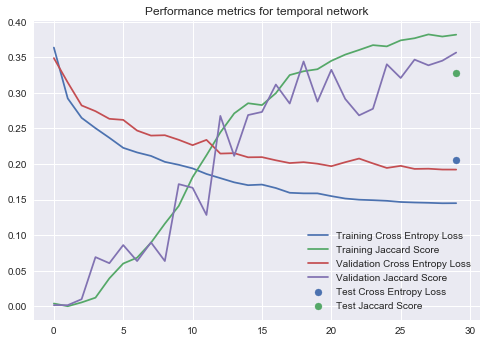

In [45]:
plt.title("Performance metrics for temporal network")
plt.plot(scores['train_loss'],label="Training Cross Entropy Loss")
plt.plot(scores['train_jac'],label="Training Jaccard Score")
plt.plot(scores['val_loss'],label="Validation Cross Entropy Loss")
plt.plot(scores['val_jac'],label="Validation Jaccard Score")
plt.scatter([29],testscores['test_loss'],label="Test Cross Entropy Loss")
plt.scatter([29],testscores['test_jac'],label="Test Jaccard Score")
plt.legend()

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.signal import decimate

In [2]:
data_path = os.getcwd() + "/data/JPEGImages/480p/"
anno_path = os.getcwd() + "/data/Annotations/480p/"

In [4]:
bear_path = data_path + "bear/"
abear_path = anno_path + "bear/"

In [5]:
bear = Image.open(bear_path+"00000.jpg").convert(mode="RGB")
abear = Image.open(abear_path+"00000.png").convert(mode="L")

In [88]:
background =bear.convert("RGBA")

In [102]:
kmmask = Image.open("kmeansbearmask.png")

In [101]:
kmmask2 = kmmask.convert('RGBA')

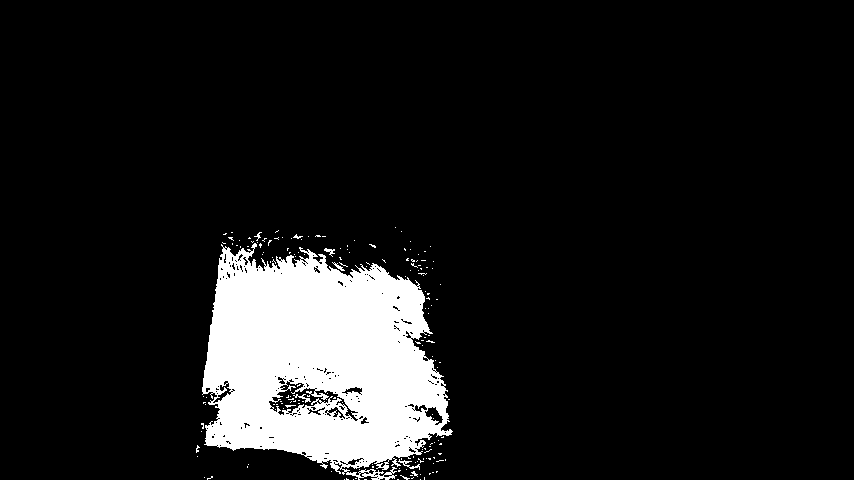

In [38]:
kmmask2

In [84]:
temp = list(kmmask2.getdata())

In [85]:
for i, pixel in enumerate(temp):
    if pixel[:3] == (255,255,255):
        temp[i] = (0,0,255,100)
    else:
        temp[i] = (255,0,0,0)
    

In [86]:
kmmask2.putdata(temp)

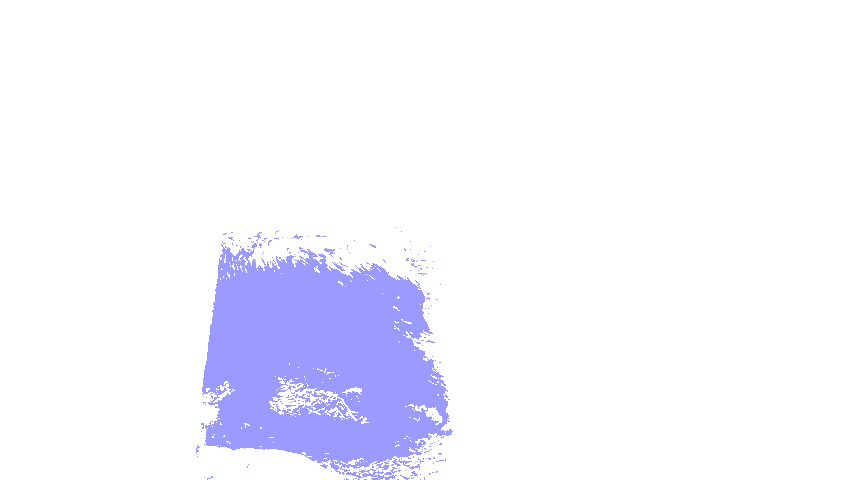

In [87]:
kmmask2

In [89]:
background.paste(kmmask2, (0,0),kmmask2)

In [92]:
background.save("maskedbear.png")

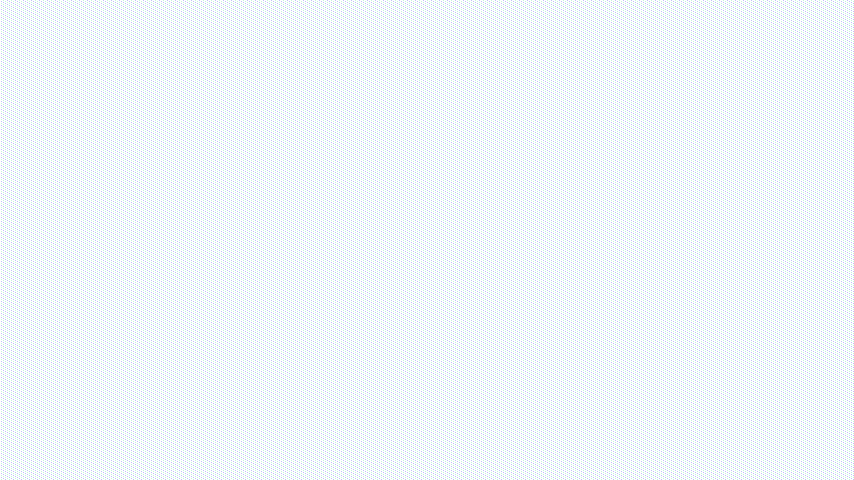

In [41]:
Image.fromarray(out, mode="RGBA")

In [98]:
def overlay_segment(img, segment):
    back = img.convert("RGBA")
    fore = segment.convert("RGBA")
    
    temp = list(fore.getdata())
    for i, pixel in enumerate(temp):
        if pixel[:3] == (255,255,255):
            temp[i] = (0,0,255,100)
        else:
            temp[i] = (255,0,0,0)
        
    fore.putdata(temp)
    
    back.paste(fore, (0,0),fore)
    
    return back
    
    

In [103]:
i = overlay_segment(bear,kmmask)

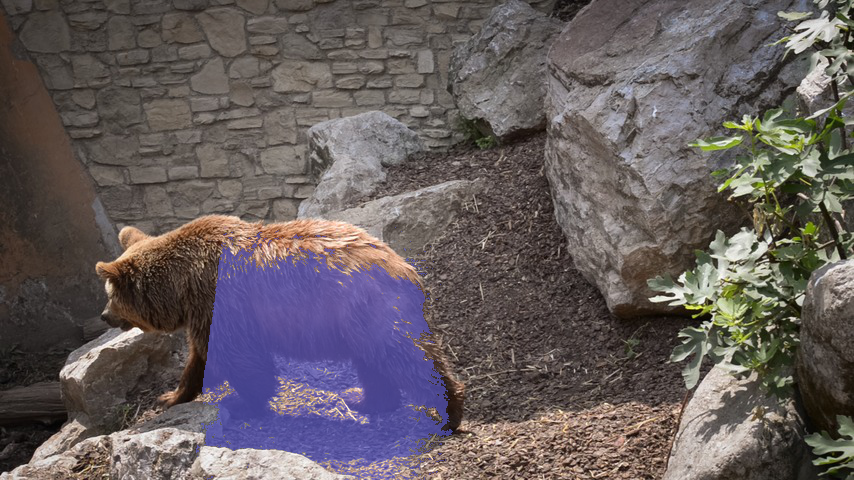

In [104]:
i

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.signal import decimate